In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_drug_df, clinical_trial_df)

# Display the data table for preview
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)": "tumor_vol"})
merged_df.head()

,Mouse ID,Drug,Timepoint,tumor_vol,Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [84]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_ser = merged_df.groupby(['Drug', 'Timepoint']).tumor_vol.mean()

# Convert to DataFrame
mean_df = pd.DataFrame(mean_ser)

# Preview DataFra
mean_df.head()

tumor_vol
Drug      Timepoint           
Capomulin 0          45.000000
          5          44.266086
          10         43.084291
          15         42.064317
          20         40.716325

In [85]:
sem_ser = merged_df.groupby(['Drug', 'Timepoint']).tumor_vol.sem()
sem_df = pd.DataFrame(sem_ser)

In [113]:
# Minor Data Munging to Re-Format the Data Frames
unstack_df = mean_df.unstack(level='Drug')

# Preview that Reformatting worked
unstack_df

tumor_vol                                                         \
Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo   
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

                                                       
Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

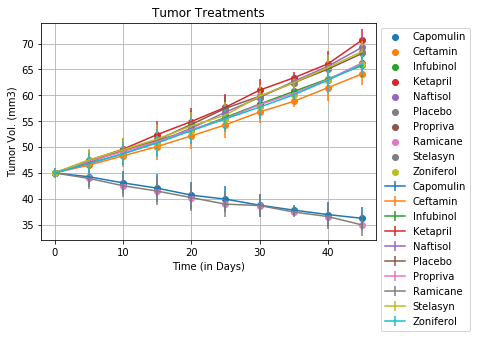

In [168]:

# scatter for each drug
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Capomulin"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Ceftamin"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Infubinol"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Ketapril"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Naftisol"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Placebo"], marker="o", color="grey")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Propriva"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Ramicane"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Stelasyn"], marker="o")
plt.scatter(unstack_df.index.values, unstack_df["tumor_vol"]["Zoniferol"], marker="o")

# error bar for each
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Capomulin"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Ceftamin"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Infubinol"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Ketapril"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Naftisol"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Placebo"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Propriva"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Ramicane"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Stelasyn"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstack_df.index.values, unstack_df["tumor_vol"]["Zoniferol"], 
             yerr=unstack_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# labels and shit
plt.title("Tumor Treatments")
plt.xlabel("Time (in Days)")
plt.ylabel("Tumor Vol. (mm3)")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim([32,74])
plt.xlim([-2,47])

#display
plt.grid(True)
plt.show()

## Metastatic Response to Treatment

In [136]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
bydrug = merged_df.groupby(['Drug','Timepoint'])

meta_df = pd.DataFrame(bydrug["Metastatic Sites"].mean())
meta_df

# Convert to DataFrame
unstackd_df = meta_df.unstack(level='Drug')

# Preview DataFrame
unstackd_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

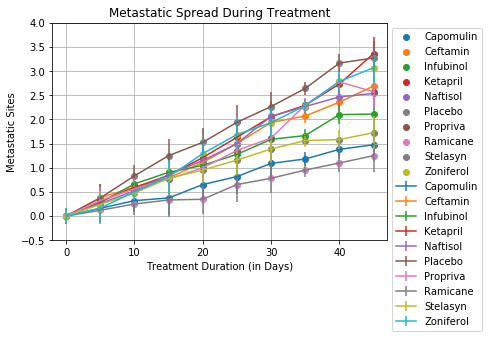

In [157]:
# scatter for each drug
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Capomulin"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ceftamin"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Infubinol"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ketapril"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Naftisol"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Placebo"], marker="o", color="grey")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Propriva"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ramicane"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Stelasyn"], marker="o")
plt.scatter(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Zoniferol"], marker="o")

#error bars for each
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Capomulin"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ceftamin"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Infubinol"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ketapril"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Naftisol"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Placebo"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Propriva"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Ramicane"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Stelasyn"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(unstackd_df.index.values, unstackd_df["Metastatic Sites"]["Zoniferol"], 
             yerr=unstackd_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# labels and shit
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (in Days)")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim([-.5,4])
plt.xlim([-2,47])

# display
plt.grid(True)
plt.show()

## Survival Rates

In [142]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
bydrug = merged_df.groupby(['Drug', 'Timepoint'])
survival_df = pd.DataFrame(bydrug["Mouse ID"].count())
survival_df = survival_df.unstack(level='Drug')
survival_df.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

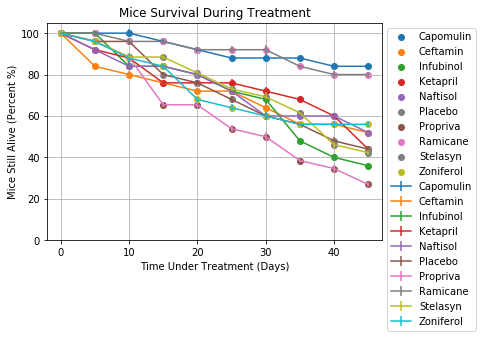

In [151]:
#scatter for each (account percentages)
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Capomulin"]/survival_df["Mouse ID"]["Capomulin"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Ceftamin"]/survival_df["Mouse ID"]["Ceftamin"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Infubinol"]/survival_df["Mouse ID"]["Infubinol"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Ketapril"]/survival_df["Mouse ID"]["Ketapril"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Naftisol"]/survival_df["Mouse ID"]["Naftisol"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Placebo"]/survival_df["Mouse ID"]["Placebo"][0]*100, marker="o", color="grey")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Propriva"]/survival_df["Mouse ID"]["Propriva"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Ramicane"]/survival_df["Mouse ID"]["Ramicane"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Stelasyn"]/survival_df["Mouse ID"]["Stelasyn"][0]*100, marker="o")
plt.scatter(survival_df.index.values, survival_df["Mouse ID"]["Zoniferol"]/survival_df["Mouse ID"]["Zoniferol"][0]*100, marker="o")

#error bars for each
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Capomulin"]/survival_df["Mouse ID"]["Capomulin"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Ceftamin"]/survival_df["Mouse ID"]["Ceftamin"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Infubinol"]/survival_df["Mouse ID"]["Infubinol"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Ketapril"]/survival_df["Mouse ID"]["Ketapril"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Naftisol"]/survival_df["Mouse ID"]["Naftisol"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Placebo"]/survival_df["Mouse ID"]["Placebo"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Propriva"]/survival_df["Mouse ID"]["Propriva"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Ramicane"]/survival_df["Mouse ID"]["Ramicane"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Stelasyn"]/survival_df["Mouse ID"]["Stelasyn"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(survival_df.index.values, survival_df["Mouse ID"]["Zoniferol"]/survival_df["Mouse ID"]["Zoniferol"][0]*100, 
             yerr=survival_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

#labels and shit

plt.title("Mice Survival During Treatment")
plt.ylabel("Mice Still Alive (Percent %)")
plt.xlabel("Time Under Treatment (Days)")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim([0,105])
plt.xlim([-2,47])

#display
plt.grid(True)
plt.show()

## Summary Bar Graph

In [212]:
# Calculate the percent changes for each drug
bydrug = merged_df.groupby(["Drug","Timepoint"]).mean()

tumor_gb = pd.DataFrame({"tumor_vol": bydrug["tumor_vol"] - 45})
tumor_change_df = tumor_gb.reset_index()

full_tumor_change_df = tumor_change_df.loc[tumor_change_df['Timepoint'] == 45]
full_tumor_change_df = full_tumor_change_df[["Drug","tumor_vol"]]
#for color
full_tumor_change_df["for_color"] = full_tumor_change_df["tumor_vol"] > 0

full_tumor_change_df = full_tumor_change_df.rename(columns={"tumor_vol": "change_in_tumor_vol"})
full_tumor_change_df = full_tumor_change_df

# Display the data to confirm
full_tumor_change_df

,Drug,change_in_tumor_vol,for_color
9,Capomulin,-8.763886,False
19,Ceftamin,19.132421,True
29,Infubinol,20.755562,True
39,Ketapril,25.662958,True
49,Naftisol,24.265506,True
59,Placebo,23.084082,True
69,Propriva,21.258529,True
79,Ramicane,-10.044405,False
89,Stelasyn,23.438310,True
99,Zoniferol,20.960888,True


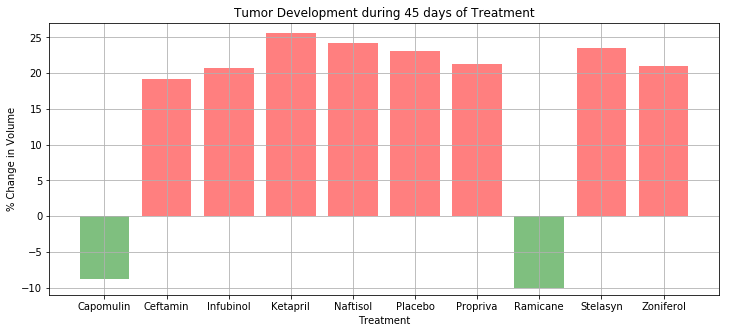

In [222]:
#orient the graph
x_axis = np.arange(len(full_tumor_change_df))
ticks = [i + .4 for i in x_axis]

#get plot background
plt.figure(figsize=(12,5))

#colors
plt.bar(x_axis, full_tumor_change_df["change_in_tumor_vol"], color=full_tumor_change_df["for_color"].map({True: 'r', False: 'g'}), alpha=0.5, align="edge")


# labels  shit
plt.title("Tumor Development during 45 days of Treatment")
plt.xlabel("Treatment")
plt.xticks(ticks, full_tumor_change_df["Drug"])
plt.ylabel("% Change in Volume")
plt.ylim([-11, 27])

#display
plt.grid(True)
plt.show()